In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
from PIL import Image

### load .txt file, and apply sobel operator

In [50]:
data = np.loadtxt("./test_image/zermatt.txt")

In [51]:
data.shape

(76800, 3)

In [52]:
grayscale=np.average(data,axis=1)
grayscale=grayscale.reshape(320,240)

In [53]:
grayscale.shape

(320, 240)

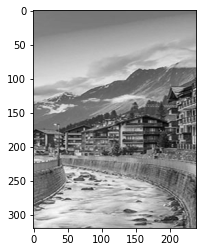

In [54]:
plt.imshow(grayscale, cmap='gray', vmin=0, vmax=255)
plt.show()

In [55]:
Gx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [56]:
gradx = signal.convolve2d(grayscale, Gx,mode='same')
grady = signal.convolve2d(grayscale, Gy,mode='same')

In [57]:
gradx.shape

(320, 240)

In [58]:
G=abs(gradx)+abs(grady)
G.shape

(320, 240)

In [59]:
print(np.amax(G))
print(np.amin(G))

1083.3333333333333
0.0


In [60]:
# binary
G[G<=200]=1
G[G>200]=0

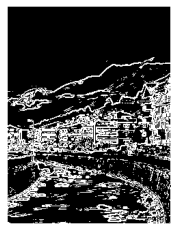

In [61]:
plt.imshow(G, cmap='binary', vmin=0, vmax=1)
plt.axis('off')
plt.savefig('zermatt_edge.png',bbox_inches='tight')
plt.show()

### Show the result generated by C++

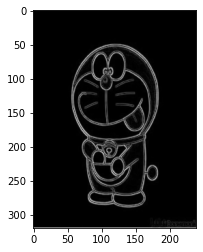

In [3]:
dataRes = np.loadtxt("imageRes.txt")
dataRes=dataRes.reshape(320,240)
plt.imshow(dataRes, cmap='gray', vmin=0, vmax=np.amax(dataRes))
plt.show()